In [1]:
import funzioni02 as f2
import numpy as np
import qiskit.ignis.mitigation.measurement as mc
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
import matplotlib.pyplot as plt

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))
backend_sim_jakarta = sim_noisy_jakarta 
backend = provider.get_backend('ibmq_jakarta')
backend_sim = Aer.get_backend('qasm_simulator')

In [5]:
### definisco i parametri fissati per la realizzazione del grafico
shots=8192
reps=1  # al massimo 10
precision=20
tempo=np.pi
backend_aus=backend_sim_jakarta
check=["copy_check", [0,2,4]]
evo_type="column_evolution" # "column_evolution" or "complete_evolution" or "trotter_steps"

### definisco i valori di steps corrispondenti ai punti che volgio acquisire
steps_range=[69]
n_s=len(steps_range)

### creo tutti i circuiti
qcs_steps=[]
qcs_steps_na=[]

### le liste qcs_steps e qcs_steps_na conterranno tutti i circuiti di evoluzione reps volte

for _ in range(reps):
    for steps in steps_range:
        
        qcs_aus, qcs_na_aus = f2.evolution_tomo(type=evo_type, steps=steps, tempo=tempo, precision=precision, initial_state='110', check=check)

        qcs_steps.append(qcs_aus)
        qcs_steps_na.append(qcs_na_aus)

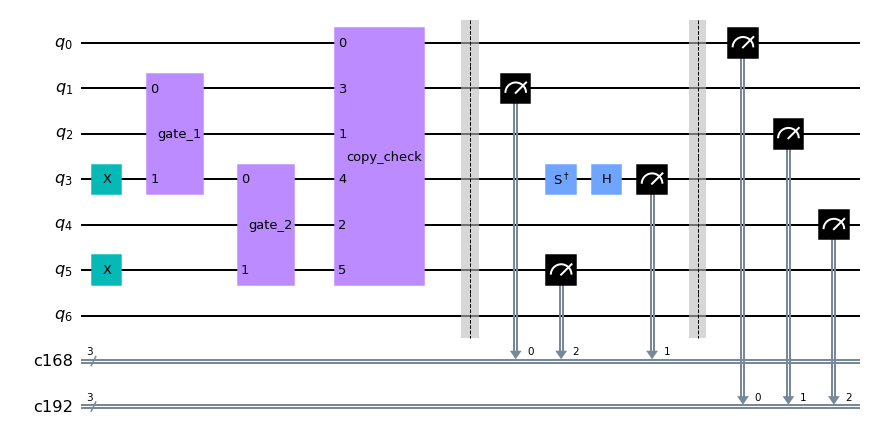

In [7]:
qcs_aus[-4].draw(output="mpl")

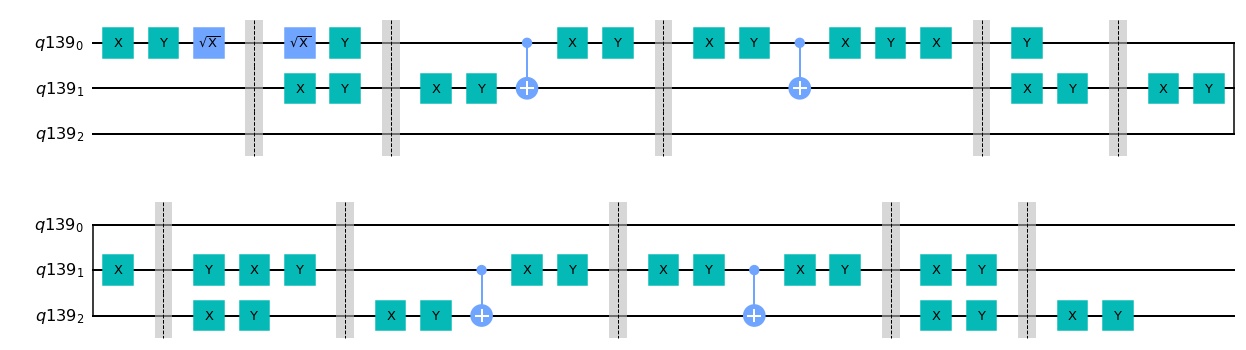

In [4]:
c=f2.calibration_cirquit(type=evo_type, N=0)
c.draw(output="mpl")